<a href="https://colab.research.google.com/github/yohanaaritonang/predicting-employees-performance-with-apriori-algorithm/blob/main/Exploratory-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#mengimpor file berupa csv
import io
%time employee = pd.read_csv("employee.csv", delimiter=',', index_col =0)

Wall time: 358 ms


In [3]:
employee.sample(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
62254,Operations,region_27,Bachelor's,female,sourcing,1,37,Great,11,Yes,No,63,No
30706,Sales & Marketing,region_33,Bachelor's,male,sourcing,1,37,Excellent,6,Yes,No,49,No
52496,Procurement,region_2,Master's & above,female,other,1,44,Excellent,4,Yes,No,72,No
71356,Finance,region_29,Bachelor's,male,other,1,38,Great,10,No,No,57,No
62321,Operations,region_27,Master's & above,female,other,2,35,Great,3,No,No,52,No


In [4]:
employee.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


In [5]:
#check missing value

round (employee.isnull().sum()/ len(employee) * 100, 4)
# employee.isna()

department             0.0000
region                 0.0000
education              4.3953
gender                 0.0000
recruitment_channel    0.0000
no_of_trainings        0.0000
age                    0.0000
performance_rating     7.5244
length_of_service      0.0000
KPIs_met >80%          0.0000
awards_won?            0.0000
avg_training_score     0.0000
is_promoted            0.0000
dtype: float64

## SEABORN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [7]:
# standard import statement for seaborn
import seaborn as sns

In [8]:
employee.shape

(54808, 13)

In [9]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   no_of_trainings      54808 non-null  int64 
 6   age                  54808 non-null  int64 
 7   performance_rating   50684 non-null  object
 8   length_of_service    54808 non-null  int64 
 9   KPIs_met >80%        54808 non-null  object
 10  awards_won?          54808 non-null  object
 11  avg_training_score   54808 non-null  int64 
 12  is_promoted          54808 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.9+ MB


## Menganalisis Variabel secara Individual

In [10]:
numerical_vars = ['no_of_trainings', 'age', 
                 'length_of_service', 'avg_training_score']
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                   'performance_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [11]:
employee = employee[numerical_vars + categorical_vars]
employee.shape

(54808, 13)

## Memahami Variabel Utama

In [12]:
employee['performance_rating'].describe()

count     50684
unique        5
top       Great
freq      18618
Name: performance_rating, dtype: object

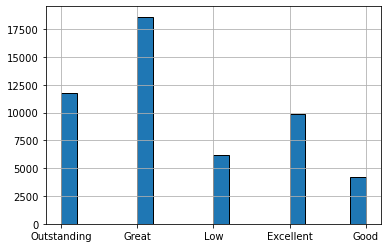

In [13]:
employee['performance_rating'].hist(edgecolor='black', bins=20);

In [14]:
print("Skewness: {:0.3f}".format(employee['length_of_service'].skew()))
print("Kurtosis: {:0.3f}".format(employee['length_of_service'].kurt()))

Skewness: 1.738
Kurtosis: 4.414


# Variabel Numerikal

In [15]:
employee[numerical_vars].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


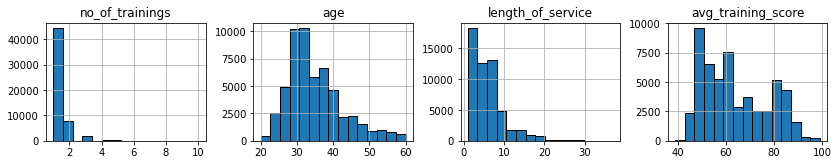

In [16]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

In [17]:
employee['age_start_of_service'] = employee['age'] - employee['length_of_service']

In [18]:
employee['age_start_of_service']

employee_id
65438    27
65141    26
7513     27
2542     29
48945    43
         ..
3030     31
74592    31
13918    24
13614    27
51526    22
Name: age_start_of_service, Length: 54808, dtype: int64

In [19]:
numerical_vars.append('age_start_of_service')

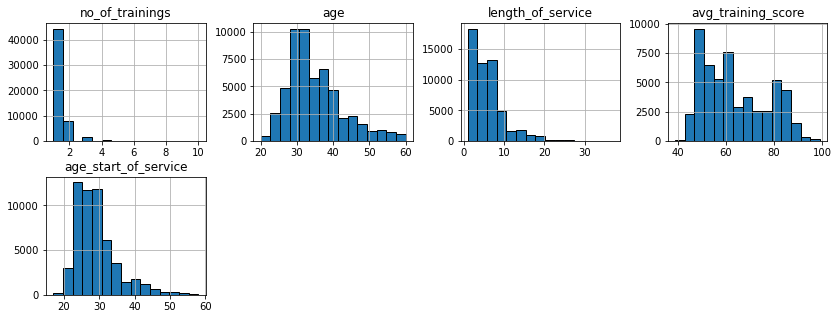

In [20]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout = (2,4));

# Variabel Kategorikal

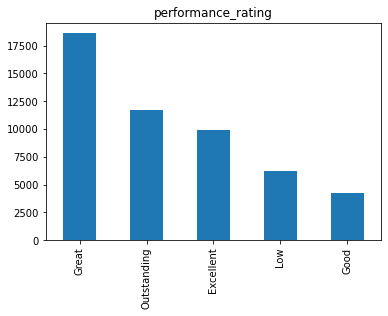

In [21]:
employee['performance_rating'].value_counts().plot(kind='bar', title='performance_rating');

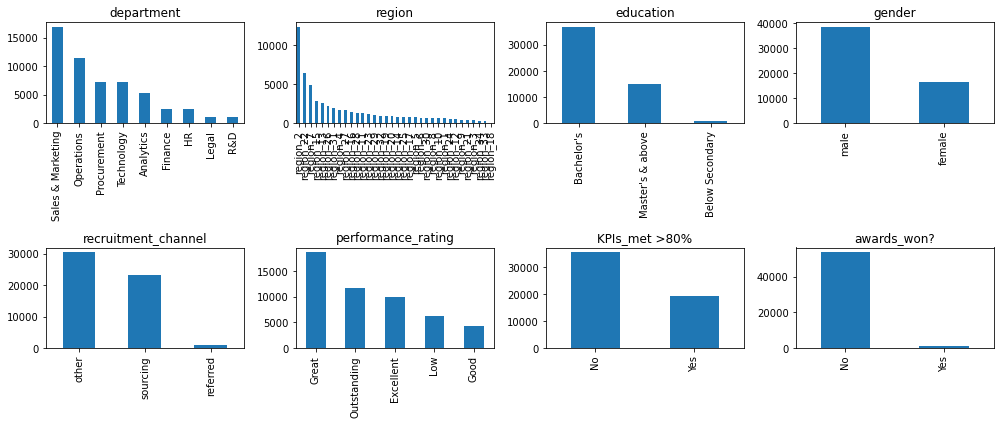

In [22]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

In [23]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [24]:
levels_to_keep = employee[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

department             [Sales & Marketing, Operations, Procurement, T...
region                 [region_2, region_22, region_7, region_15, reg...
education                [Bachelor's, Master's & above, Below Secondary]
gender                                                    [male, female]
recruitment_channel                          [other, sourcing, referred]
performance_rating            [Great, Outstanding, Excellent, Low, Good]
KPIs_met >80%                                                  [No, Yes]
awards_won?                                                    [No, Yes]
is_promoted                                                    [No, Yes]
dtype: object

In [25]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(levels_to_keep[var])]

In [26]:
employee.shape

(48660, 14)

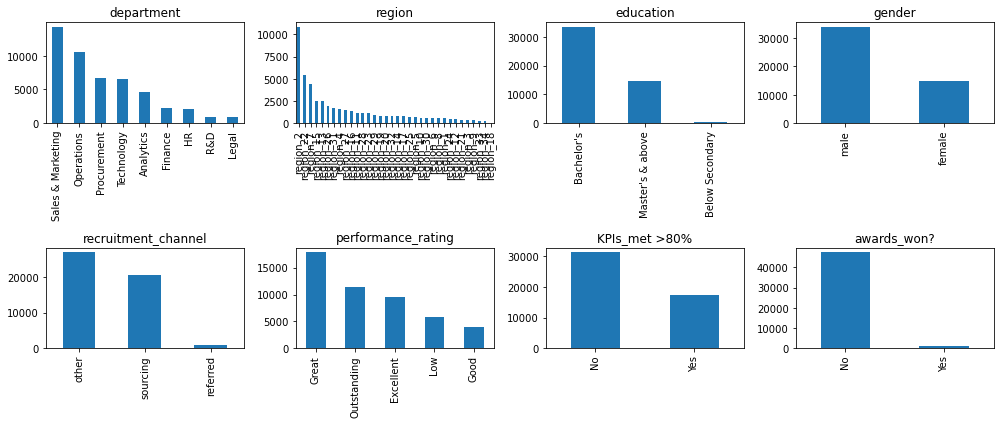

In [27]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

## Hubungan Antara Variabel dengan Scatter Plot

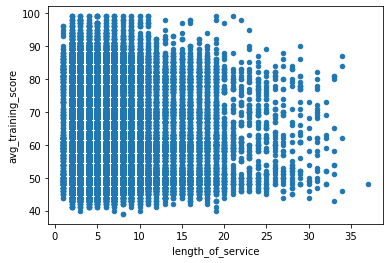

In [28]:
employee.plot.scatter(x='length_of_service', y='avg_training_score');

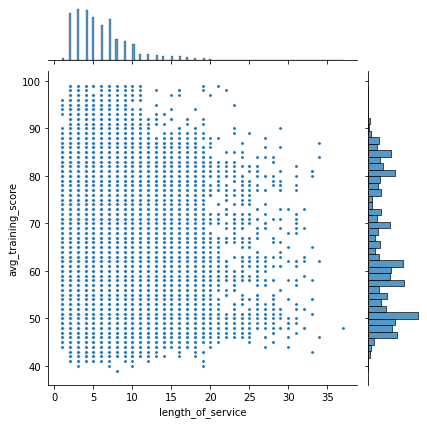

In [29]:
sns.jointplot(x='length_of_service', y='avg_training_score', data=employee, joint_kws={"s": 10});

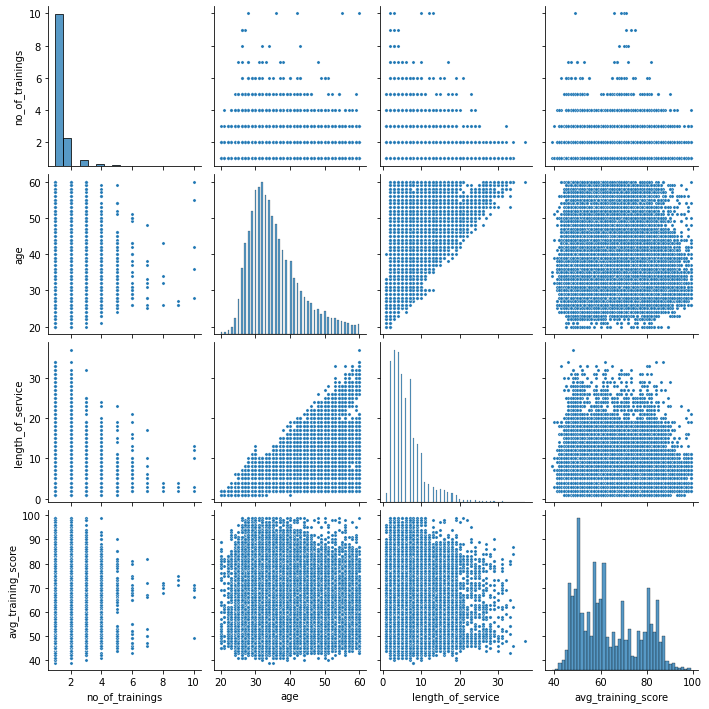

In [30]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

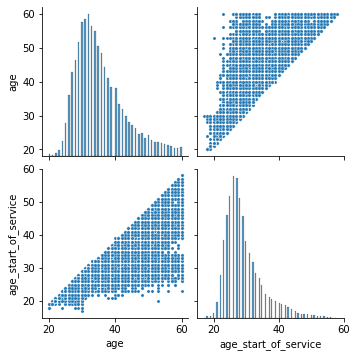

In [31]:
sns.pairplot(employee[['age']+numerical_vars[4:]], plot_kws={"s": 10});

In [32]:
employee[numerical_vars].corr()

,no_of_trainings,age,length_of_service,avg_training_score,age_start_of_service
no_of_trainings,1.000000,-0.083590,-0.055440,0.042033,-0.066918
age,-0.083590,1.000000,0.620348,-0.066214,0.830974
length_of_service,-0.055440,0.620348,1.000000,-0.047461,0.079164
avg_training_score,0.042033,-0.066214,-0.047461,1.000000,-0.050493
age_start_of_service,-0.066918,0.830974,0.079164,-0.050493,1.000000


In [33]:
employee[numerical_vars].corr()['age'].sort_values(ascending=False)

age                     1.000000
age_start_of_service    0.830974
length_of_service       0.620348
avg_training_score     -0.066214
no_of_trainings        -0.083590
Name: age, dtype: float64

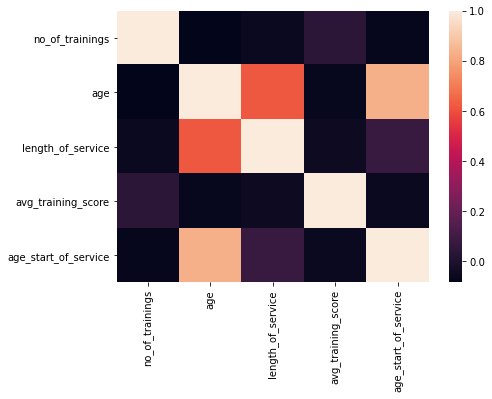

In [34]:
correlations = employee[numerical_vars].corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Hubungan Antara Variabel dengan Scatter Plot

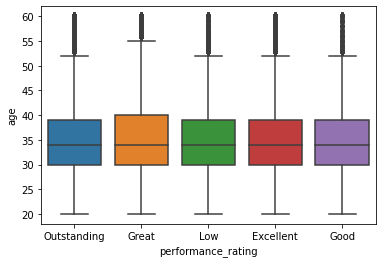

In [35]:
sns.boxplot(x='performance_rating', y='age', data=employee);

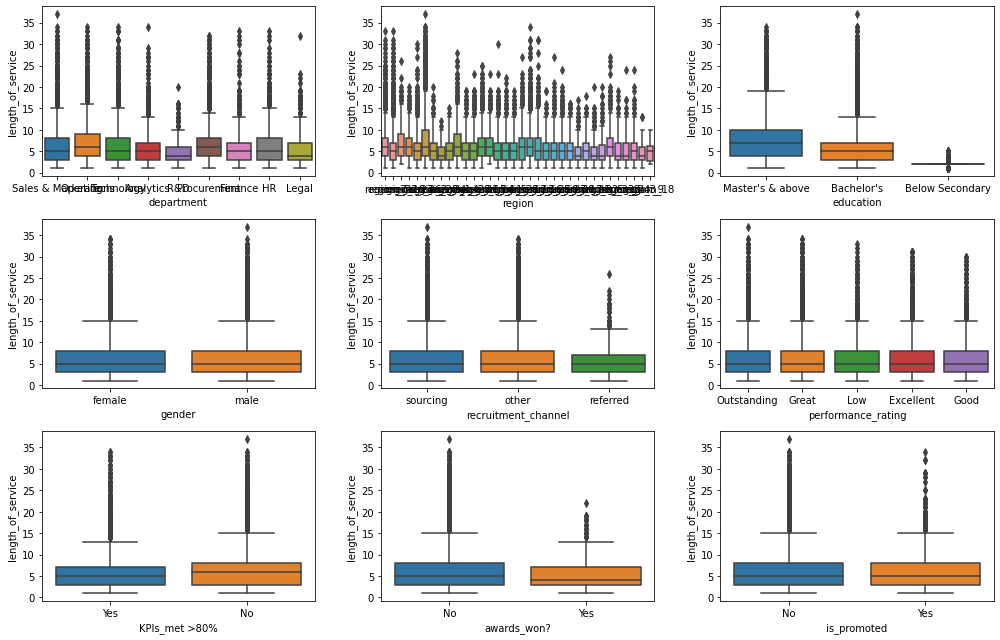

In [36]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='length_of_service', data=employee, ax=subplot)
    
    fig.tight_layout()

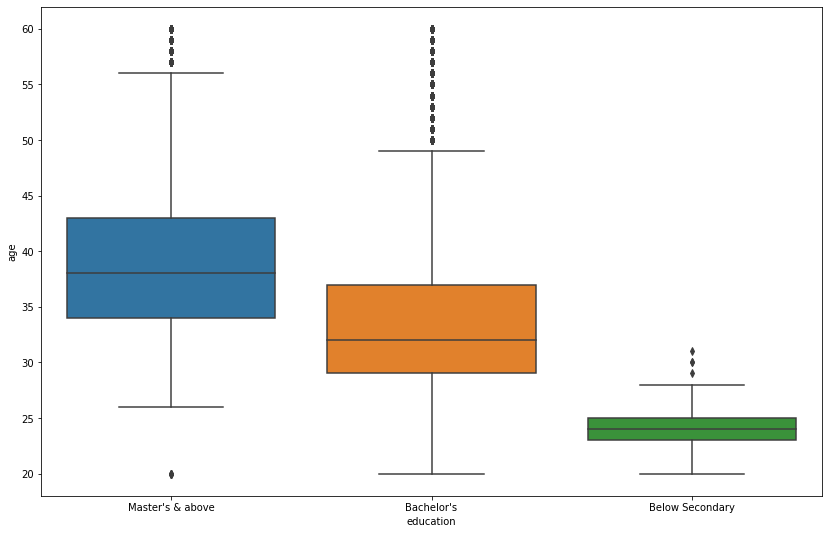

In [37]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='education', y='age', data=employee,ax=ax);

In [38]:
sorted_nb = employee.groupby('education')['age'].median().sort_values().index.values

In [39]:
sorted_nb

array(['Below Secondary', "Bachelor's", "Master's & above"], dtype=object)

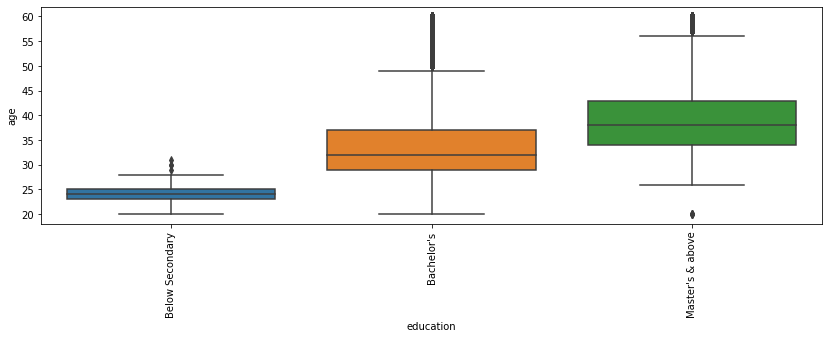

In [40]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='education', y='age', data=employee, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

## Hubungan Antara Variabel dengan Complex Conditional Plots

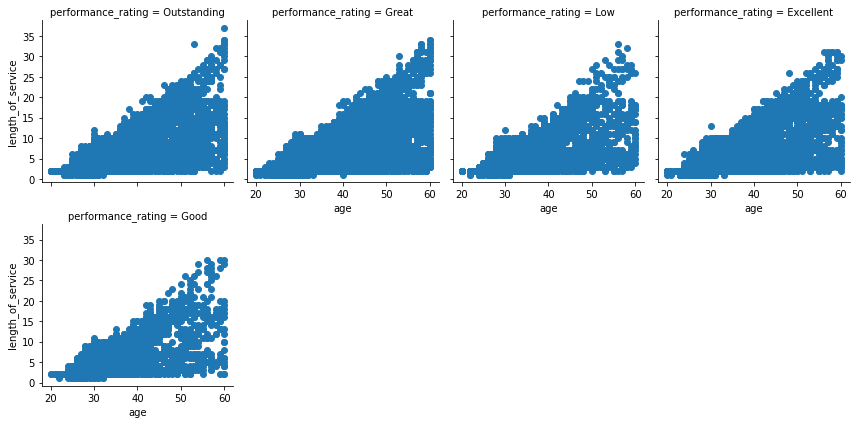

In [41]:
conditional_plot = sns.FacetGrid(employee, col="performance_rating", col_wrap=4)
conditional_plot.map(plt.scatter, "age", "length_of_service");

# Data Cleaning

In [42]:
employee = pd.read_csv("employee.csv")

In [43]:
#check missing value

#round (employee.isnull().sum()/ len(employee) * 100, 4)
employee.isna()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [44]:
# Agregasi data untuk mengetahui jumlah cell yang hilang dan pada lokasi atribut
employee.isna().sum()

employee_id               0
department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
performance_rating     4124
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

Terdapat missing value pada atribut education dan performance_rating

## Handling Missing data (Drop Missing Values)

In [45]:
employee

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,Outstanding,8,Yes,No,49,No
1,65141,Operations,region_22,Bachelor's,male,other,1,30,Outstanding,4,No,No,60,No
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,Great,7,No,No,50,No
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,Low,10,No,No,50,No
4,48945,Technology,region_26,Bachelor's,male,other,1,45,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,male,sourcing,1,48,Great,17,No,No,78,No
54804,74592,Operations,region_27,Master's & above,female,other,1,37,Good,6,No,No,56,No
54805,13918,Analytics,region_1,Bachelor's,male,other,1,27,Outstanding,3,Yes,No,79,No
54806,13614,Sales & Marketing,region_9,NaN,male,sourcing,1,29,Low,2,No,No,45,No


In [46]:
# change data to dataframe
data_df = pd.DataFrame(employee)
print (data_df)

       employee_id         department     region         education  gender  \
0            65438  Sales & Marketing   region_7  Master's & above  female   
1            65141         Operations  region_22        Bachelor's    male   
2             7513  Sales & Marketing  region_19        Bachelor's    male   
3             2542  Sales & Marketing  region_23        Bachelor's    male   
4            48945         Technology  region_26        Bachelor's    male   
...            ...                ...        ...               ...     ...   
54803         3030         Technology  region_14        Bachelor's    male   
54804        74592         Operations  region_27  Master's & above  female   
54805        13918          Analytics   region_1        Bachelor's    male   
54806        13614  Sales & Marketing   region_9               NaN    male   
54807        51526                 HR  region_22        Bachelor's    male   

      recruitment_channel  no_of_trainings  age performance_rat

In [47]:
print(employee.shape)

(54808, 14)


In [48]:
# drop missing value
employee_dropna = employee.dropna()
print(employee_dropna.shape)

(48660, 14)


In [49]:
print(employee_dropna)

       employee_id         department     region         education  gender  \
0            65438  Sales & Marketing   region_7  Master's & above  female   
1            65141         Operations  region_22        Bachelor's    male   
2             7513  Sales & Marketing  region_19        Bachelor's    male   
3             2542  Sales & Marketing  region_23        Bachelor's    male   
4            48945         Technology  region_26        Bachelor's    male   
...            ...                ...        ...               ...     ...   
54802         6915  Sales & Marketing  region_14        Bachelor's    male   
54803         3030         Technology  region_14        Bachelor's    male   
54804        74592         Operations  region_27  Master's & above  female   
54805        13918          Analytics   region_1        Bachelor's    male   
54807        51526                 HR  region_22        Bachelor's    male   

      recruitment_channel  no_of_trainings  age performance_rat

In [50]:
#recheck missing value
round (employee_dropna.isnull().sum()/ len(employee_dropna) * 100, 4)

employee_id            0.0
department             0.0
region                 0.0
education              0.0
gender                 0.0
recruitment_channel    0.0
no_of_trainings        0.0
age                    0.0
performance_rating     0.0
length_of_service      0.0
KPIs_met >80%          0.0
awards_won?            0.0
avg_training_score     0.0
is_promoted            0.0
dtype: float64

In [51]:
employee[['education', 'performance_rating']].isnull().sum()

education             2409
performance_rating    4124
dtype: int64

In [52]:
employee_dropna[['education', 'performance_rating']].isnull().sum()

education             0
performance_rating    0
dtype: int64

Nothing missing value

# Data Reduction

In [53]:
employee = employee_dropna

In [54]:
employee

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,Outstanding,8,Yes,No,49,No
1,65141,Operations,region_22,Bachelor's,male,other,1,30,Outstanding,4,No,No,60,No
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,Great,7,No,No,50,No
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,Low,10,No,No,50,No
4,48945,Technology,region_26,Bachelor's,male,other,1,45,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,male,other,2,31,Low,2,No,No,49,No
54803,3030,Technology,region_14,Bachelor's,male,sourcing,1,48,Great,17,No,No,78,No
54804,74592,Operations,region_27,Master's & above,female,other,1,37,Good,6,No,No,56,No
54805,13918,Analytics,region_1,Bachelor's,male,other,1,27,Outstanding,3,Yes,No,79,No


In [55]:
# Drop irrelevant attributes
employee = employee.drop('department', axis=1)
employee = employee.drop('region', axis=1)
employee = employee.drop('gender', axis=1)
employee = employee.drop('recruitment_channel', axis=1)
employee = employee.drop('age', axis=1)

In [56]:
employee

,employee_id,education,no_of_trainings,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Master's & above,1,Outstanding,8,Yes,No,49,No
1,65141,Bachelor's,1,Outstanding,4,No,No,60,No
2,7513,Bachelor's,1,Great,7,No,No,50,No
3,2542,Bachelor's,2,Low,10,No,No,50,No
4,48945,Bachelor's,1,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...
54802,6915,Bachelor's,2,Low,2,No,No,49,No
54803,3030,Bachelor's,1,Great,17,No,No,78,No
54804,74592,Master's & above,1,Good,6,No,No,56,No
54805,13918,Bachelor's,1,Outstanding,3,Yes,No,79,No


## Implementing Apriori Algorithm

In [57]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Dari data yang telah direduksi, terdapat 6 atribut atau kolom yang akan digunakan, yaitu:
1. education
2. no_of_trainings
3. length_of_service
4. KPIs_met>80%
5. awards_won
6. avg_training_score
7. performance rating

Dari ketujuh atribut tersebut, terdapat 3 variabel numerikal yaitu no_of_trainings, length_of_service, dan avg_training_score. Berdasarkan data yang ada variabel length_of_service dan avg_training_score akan dibagi ke dalam 4 bin.

In [59]:
#create bins for length_of_service
pd.qcut(employee['length_of_service'], q=4)

0          (5.0, 8.0]
1          (3.0, 5.0]
2          (5.0, 8.0]
3         (8.0, 37.0]
4        (0.999, 3.0]
             ...     
54802    (0.999, 3.0]
54803     (8.0, 37.0]
54804      (5.0, 8.0]
54805    (0.999, 3.0]
54807      (3.0, 5.0]
Name: length_of_service, Length: 48660, dtype: category
Categories (4, interval[float64]): [(0.999, 3.0] < (3.0, 5.0] < (5.0, 8.0] < (8.0, 37.0]]

In [60]:
#create length_of_service_range column
employee['length_of_service_range'] = pd.qcut(employee['length_of_service'], q=4, labels=['<=8', '>3 <=5', '>5 <=8', '>8'])

In [61]:
#show length_of_service_range column
employee['length_of_service_range']

0        >5 <=8
1        >3 <=5
2        >5 <=8
3            >8
4           <=8
          ...  
54802       <=8
54803        >8
54804    >5 <=8
54805       <=8
54807    >3 <=5
Name: length_of_service_range, Length: 48660, dtype: category
Categories (4, object): ['<=8' < '>3 <=5' < '>5 <=8' < '>8']

In [62]:
#create bins for avg_training_score
pd.qcut(employee['avg_training_score'], q=4)

0        (38.999, 51.0]
1          (51.0, 60.0]
2        (38.999, 51.0]
3        (38.999, 51.0]
4          (60.0, 76.0]
              ...      
54802    (38.999, 51.0]
54803      (76.0, 99.0]
54804      (51.0, 60.0]
54805      (76.0, 99.0]
54807    (38.999, 51.0]
Name: avg_training_score, Length: 48660, dtype: category
Categories (4, interval[float64]): [(38.999, 51.0] < (51.0, 60.0] < (60.0, 76.0] < (76.0, 99.0]]

In [63]:
#create avg_training_score_range column
employee['avg_training_score_range'] = pd.qcut(employee['avg_training_score'], q=4, labels=['<=51', '>51 <=60', '>60 <=76', '>76'])

In [64]:
#show avg_training_score_range column
employee['avg_training_score_range']

0            <=51
1        >51 <=60
2            <=51
3            <=51
4        >60 <=76
           ...   
54802        <=51
54803         >76
54804    >51 <=60
54805         >76
54807        <=51
Name: avg_training_score_range, Length: 48660, dtype: category
Categories (4, object): ['<=51' < '>51 <=60' < '>60 <=76' < '>76']

In [101]:
employee

,education_Bachelor's,education_Below Secondary,education_Master's & above,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,...,length_of_service_range_>5 <=8,length_of_service_range_>8,KPIs_met >80%_No,KPIs_met >80%_Yes,awards_won?_No,awards_won?_Yes,avg_training_score_range_<=51,avg_training_score_range_>51 <=60,avg_training_score_range_>60 <=76,avg_training_score_range_>76
0,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
54803,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
54804,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
54805,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [66]:
columns = ['performance_rating',
           'education',
           'no_of_trainings',
           'length_of_service_range',
           'KPIs_met >80%',
           'awards_won?',
           'avg_training_score_range']

not_used_columns = list(set(employee.columns.to_list()) - set(columns))

employee = pd.get_dummies(employee, columns=columns)

employee.drop(labels=not_used_columns, axis=1, inplace=True)

In [72]:
employee

,performance_rating_Excellent,performance_rating_Good,performance_rating_Great,performance_rating_Low,performance_rating_Outstanding,education_Bachelor's,education_Below Secondary,education_Master's & above,no_of_trainings_1,no_of_trainings_2,...,length_of_service_range_>5 <=8,length_of_service_range_>8,KPIs_met >80%_No,KPIs_met >80%_Yes,awards_won?_No,awards_won?_Yes,avg_training_score_range_<=51,avg_training_score_range_>51 <=60,avg_training_score_range_>60 <=76,avg_training_score_range_>76
0,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,1,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,1,...,0,1,1,0,1,0,1,0,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
54803,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1
54804,0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,0,0
54805,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [97]:
#Apriori min support
min_support = 0.05

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)

rules = association_rules(frequent_items, metric='lift', min_threshold=1)

rules.head(50).sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(performance_rating_Good),(awards_won?_No),0.082922,0.976860,0.081504,0.982900,1.006183,0.000501,1.353196
42,(performance_rating_Low),(awards_won?_No),0.120982,0.976860,0.118824,0.982164,1.005430,0.000642,1.297391
32,(performance_rating_Great),(awards_won?_No),0.367180,0.976860,0.359227,0.978340,1.001515,0.000543,1.068334
8,(performance_rating_Excellent),(awards_won?_No),0.195417,0.976860,0.191019,0.977495,1.000650,0.000124,1.028223
40,(performance_rating_Low),(KPIs_met >80%_No),0.120982,0.643527,0.105343,0.870732,1.353063,0.027488,2.757634
46,(performance_rating_Outstanding),(no_of_trainings_1),0.233498,0.809700,0.196383,0.841049,1.038717,0.007320,1.197225
3,(performance_rating_Excellent),(no_of_trainings_1),0.195417,0.809700,0.163810,0.838258,1.035271,0.005581,1.176569
18,(performance_rating_Good),(no_of_trainings_1),0.082922,0.809700,0.068660,0.828005,1.022607,0.001518,1.106427
20,(performance_rating_Good),(KPIs_met >80%_No),0.082922,0.643527,0.067571,0.814870,1.266257,0.014208,1.925529
31,(performance_rating_Great),(KPIs_met >80%_No),0.367180,0.643527,0.271126,0.738400,1.147428,0.034836,1.362668


In [76]:
rules.count()

antecedents           2044
consequents           2044
antecedent support    2044
consequent support    2044
support               2044
confidence            2044
lift                  2044
leverage              2044
conviction            2044
dtype: int64

In [77]:
employee['performance_rating_Low'].value_counts()

0    42773
1     5887
Name: performance_rating_Low, dtype: int64

In [78]:
employee['performance_rating_Good'].value_counts()

0    44625
1     4035
Name: performance_rating_Good, dtype: int64

In [79]:
employee['performance_rating_Great'].value_counts()

0    30793
1    17867
Name: performance_rating_Great, dtype: int64

In [80]:
employee['performance_rating_Excellent'].value_counts()

0    39151
1     9509
Name: performance_rating_Excellent, dtype: int64

In [81]:
employee['performance_rating_Outstanding'].value_counts()

0    37298
1    11362
Name: performance_rating_Outstanding, dtype: int64

Dapat dilihat urutan performance rating berdasarkan jumlahnya sebagai berikut:
1. Great
2. Outstanding
3. Excellent
4. Low
5. Good

In [108]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.00005

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Great\'}'

results_performance_rating_great = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_great.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12868,"(no_of_trainings_2, education_Below Secondary,...",(performance_rating_Great),0.000062,0.36718,0.000062,1.000000,2.723457,0.000039,inf
15911,"(no_of_trainings_10, KPIs_met >80%_No, awards_...",(performance_rating_Great),0.000103,0.36718,0.000082,0.800000,2.178765,0.000044,3.164098
1606,"(no_of_trainings_10, KPIs_met >80%_No)",(performance_rating_Great),0.000103,0.36718,0.000082,0.800000,2.178765,0.000044,3.164098
52,(no_of_trainings_10),(performance_rating_Great),0.000103,0.36718,0.000082,0.800000,2.178765,0.000044,3.164098
1613,"(no_of_trainings_10, awards_won?_No)",(performance_rating_Great),0.000103,0.36718,0.000082,0.800000,2.178765,0.000044,3.164098
15783,"(length_of_service_range_<=8, no_of_trainings_...",(performance_rating_Great),0.000103,0.36718,0.000082,0.800000,2.178765,0.000044,3.164098
15515,"(avg_training_score_range_>51 <=60, length_of_...",(performance_rating_Great),0.000185,0.36718,0.000144,0.777778,2.118244,0.000076,2.847688
14988,"(awards_won?_Yes, no_of_trainings_3, KPIs_met ...",(performance_rating_Great),0.000185,0.36718,0.000144,0.777778,2.118244,0.000076,2.847688
1250,"(education_Below Secondary, no_of_trainings_4)",(performance_rating_Great),0.000082,0.36718,0.000062,0.750000,2.042592,0.000031,2.531278
15925,"(no_of_trainings_10, KPIs_met >80%_No, avg_tra...",(performance_rating_Great),0.000082,0.36718,0.000062,0.750000,2.042592,0.000031,2.531278


In [109]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.00005

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Outstanding\'}'

results_performance_rating_outstanding = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_outstanding

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23283,"(avg_training_score_range_>76, no_of_trainings...",(performance_rating_Outstanding),0.000082,0.233498,0.000062,0.750000,3.212023,0.000042,3.066009
21273,"(no_of_trainings_3, education_Below Secondary,...",(performance_rating_Outstanding),0.000185,0.233498,0.000123,0.666667,2.855131,0.000080,2.299507
22975,"(no_of_trainings_3, length_of_service_range_>8...",(performance_rating_Outstanding),0.001028,0.233498,0.000678,0.660000,2.826580,0.000438,2.254418
23793,"(length_of_service_range_>8, KPIs_met >80%_Yes...",(performance_rating_Outstanding),0.010604,0.233498,0.005672,0.534884,2.290745,0.003196,1.647980
22725,"(length_of_service_range_>8, no_of_trainings_2...",(performance_rating_Outstanding),0.006227,0.233498,0.003206,0.514851,2.204953,0.001752,1.579933
...,...,...,...,...,...,...,...,...,...
22743,"(avg_training_score_range_>76, length_of_servi...",(performance_rating_Outstanding),0.006494,0.233498,0.001521,0.234177,1.002910,0.000004,1.000887
22385,"(no_of_trainings_1, length_of_service_range_>8...",(performance_rating_Outstanding),0.047986,0.233498,0.011221,0.233833,1.001436,0.000016,1.000438
20533,"(no_of_trainings_1, education_Bachelor's, avg_...",(performance_rating_Outstanding),0.141081,0.233498,0.032963,0.233649,1.000648,0.000021,1.000197
21770,"(education_Master's & above, length_of_service...",(performance_rating_Outstanding),0.012228,0.233498,0.002857,0.233613,1.000496,0.000001,1.000151


In [113]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.00005

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Excellent\'}'

results_performance_rating_excellent = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_excellent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6245,"(education_Master's & above, no_of_trainings_6...",(performance_rating_Excellent),0.000144,0.195417,0.000062,0.428571,2.193110,0.000034,1.408020
426,"(education_Master's & above, no_of_trainings_6)",(performance_rating_Excellent),0.000144,0.195417,0.000062,0.428571,2.193110,0.000034,1.408020
6230,"(education_Master's & above, KPIs_met >80%_No,...",(performance_rating_Excellent),0.000144,0.195417,0.000062,0.428571,2.193110,0.000034,1.408020
5955,"(avg_training_score_range_>76, KPIs_met >80%_Y...",(performance_rating_Excellent),0.000925,0.195417,0.000390,0.422222,2.160620,0.000210,1.392547
5681,"(education_Below Secondary, no_of_trainings_2,...",(performance_rating_Excellent),0.000555,0.195417,0.000206,0.370370,1.895280,0.000097,1.277867
...,...,...,...,...,...,...,...,...,...
6868,"(avg_training_score_range_>76, no_of_trainings...",(performance_rating_Excellent),0.035142,0.195417,0.006885,0.195906,1.002504,0.000017,1.000608
0,(education_Bachelor's),(performance_rating_Excellent),0.686478,0.195417,0.134464,0.195875,1.002341,0.000314,1.000569
338,"(education_Bachelor's, awards_won?_No)",(performance_rating_Excellent),0.670469,0.195417,0.131299,0.195831,1.002120,0.000278,1.000515
714,"(avg_training_score_range_>76, length_of_servi...",(performance_rating_Excellent),0.042931,0.195417,0.008405,0.195787,1.001895,0.000016,1.000460


In [114]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.00005

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Good\'}'

results_performance_rating_good = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_good

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10977,"(avg_training_score_range_>51 <=60, length_of_...",(performance_rating_Good),0.000185,0.082922,0.000062,0.333333,4.019827,4.631523e-05,1.375617
9580,"(education_Master's & above, length_of_service...",(performance_rating_Good),0.000308,0.082922,0.000082,0.266667,3.215861,5.664129e-05,1.250560
10894,"(avg_training_score_range_<=51, length_of_serv...",(performance_rating_Good),0.000822,0.082922,0.000206,0.250000,3.014870,1.373429e-04,1.222770
11043,"(avg_training_score_range_<=51, KPIs_met >80%_...",(performance_rating_Good),0.000247,0.082922,0.000062,0.250000,3.014870,4.120288e-05,1.222770
10949,"(avg_training_score_range_>60 <=76, length_of_...",(performance_rating_Good),0.000514,0.082922,0.000103,0.200000,2.411896,6.015088e-05,1.146347
...,...,...,...,...,...,...,...,...,...
11093,"(length_of_service_range_<=8, KPIs_met >80%_No...",(performance_rating_Good),0.000740,0.082922,0.000062,0.083333,1.004957,3.040803e-07,1.000448
10726,"(avg_training_score_range_>51 <=60, no_of_trai...",(performance_rating_Good),0.001480,0.082922,0.000123,0.083333,1.004957,6.081606e-07,1.000448
29,(length_of_service_range_>3 <=5),(performance_rating_Good),0.250863,0.082922,0.020900,0.083313,1.004710,9.797087e-05,1.000426
10481,"(KPIs_met >80%_No, no_of_trainings_2, length_o...",(performance_rating_Good),0.025688,0.082922,0.002137,0.083200,1.003349,7.133217e-06,1.000303


In [115]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.00005

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Low\'}'

results_performance_rating_low = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_low

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19804,"(avg_training_score_range_>51 <=60, no_of_trai...",(performance_rating_Low),0.000062,0.120982,0.000062,1.000000,8.265670,5.419344e-05,inf
2091,"(no_of_trainings_6, length_of_service_range_>3...",(performance_rating_Low),0.000082,0.120982,0.000062,0.750000,6.199253,5.170717e-05,3.516071
19874,"(avg_training_score_range_>51 <=60, no_of_trai...",(performance_rating_Low),0.000082,0.120982,0.000062,0.750000,6.199253,5.170717e-05,3.516071
19762,"(awards_won?_No, no_of_trainings_6, length_of_...",(performance_rating_Low),0.000082,0.120982,0.000062,0.750000,6.199253,5.170717e-05,3.516071
19846,"(avg_training_score_range_>51 <=60, KPIs_met >...",(performance_rating_Low),0.000082,0.120982,0.000062,0.750000,6.199253,5.170717e-05,3.516071
...,...,...,...,...,...,...,...,...,...
2087,"(no_of_trainings_5, avg_training_score_range_>...",(performance_rating_Low),0.000843,0.120982,0.000103,0.121951,1.008009,8.163711e-07,1.001103
16603,"(no_of_trainings_1, education_Bachelor's, leng...",(performance_rating_Low),0.140752,0.120982,0.017160,0.121916,1.007714,1.313614e-04,1.001063
81,(awards_won?_No),(performance_rating_Low),0.976860,0.120982,0.118824,0.121639,1.005430,6.417201e-04,1.000748
2173,"(awards_won?_No, length_of_service_range_>5 <=8)",(performance_rating_Low),0.256371,0.120982,0.031114,0.121363,1.003144,9.752320e-05,1.000433
